<div align="center">

<img src="https://www.telecom-paris.fr/wp-content-EvDsK19/uploads/2024/01/logo_telecom_ipparis_rvb_fond_h.png" alt="Telecom Paris Logo" width="300"/>

---

# **Projet Big Data - EDA**
## *IADATA700 - Kit Big Data*

# 📊 Analyse statistique / Recettes / Long-Terme

In [1]:
import sys
sys.path.append('..')

# Forcer le rechargement de notre module
from _data_utils import *

import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import warnings

from scipy import stats
from scipy.stats import spearmanr, kendalltau, kruskal, chi2_contingency
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

if '_data_utils' in sys.modules:
    import _data_utils
    importlib.reload(_data_utils)
    if hasattr(_data_utils, 'data_utils_recipes'):
        importlib.reload(_data_utils.data_utils_recipes)

warnings.filterwarnings('ignore')

# Configuration graphique
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("✅ Import réussi !")

✅ _data_utils module chargé (common + ratings + recipes)
✅ _data_utils module chargé (common + ratings + recipes)
✅ Import réussi !


## 📥 Chargement des données

In [2]:
# 🚀 Pipeline complet : charge + nettoie + enrichit
df = load_clean_recipes()

print(f"✅ Dataset prêt : {df.shape[0]:,} lignes × {df.shape[1]} colonnes")
print(f"📅 Période : {df['year'].min()} - {df['year'].max()}")

✅ RAW_recipes chargée : 231,637 lignes × 12 colonnes
🧹 Nettoyage des recettes...
   ✓ 18,482 recettes avec minutes invalides (<1 ou >180)
   ℹ️  Seuils calculés (IQ 90% = Q5%-Q95%):
      • n_steps: [2, 24] (médiane=9, moyenne=9.7)
      • n_ingredients: [3, 17] (médiane=9, moyenne=9.0)
   ✓ 13,088 recettes avec n_steps ou n_ingredients aberrants (hors IQ 90%)
✅ Nettoyage terminé : 200,066 recettes conservées (31,571 supprimées)
⚙️ Enrichissement des recettes...
✅ Enrichissement terminé : 28 colonnes totales
✅ Dataset prêt : 200,066 lignes × 28 colonnes
📅 Période : 1999 - 2018


In [3]:
# 📊 Rapport de qualité
report = analyze_recipe_quality(df)

📊 Analyse de qualité des données...

📋 RAPPORT DE QUALITÉ - RAW_recipes
📦 Dimensions : 200,066 lignes × 28 colonnes
🔄 Doublons : 0

⚠️  Valeurs nulles :
   • description: 3,770 (1.9%)
   • description_length: 3,770 (1.9%)

⏱️ Minutes : médiane=35, moyenne=42.4, max=180
🔜 Steps : médiane=8, moyenne=9.2, max=24
🥕 Ingrédients : médiane=9, moyenne=8.8, max=17

📅 Période : 1999-08-06 → 2018-12-04 (19 ans)



## 📊 Analyse 1 : Volume de recettes par année

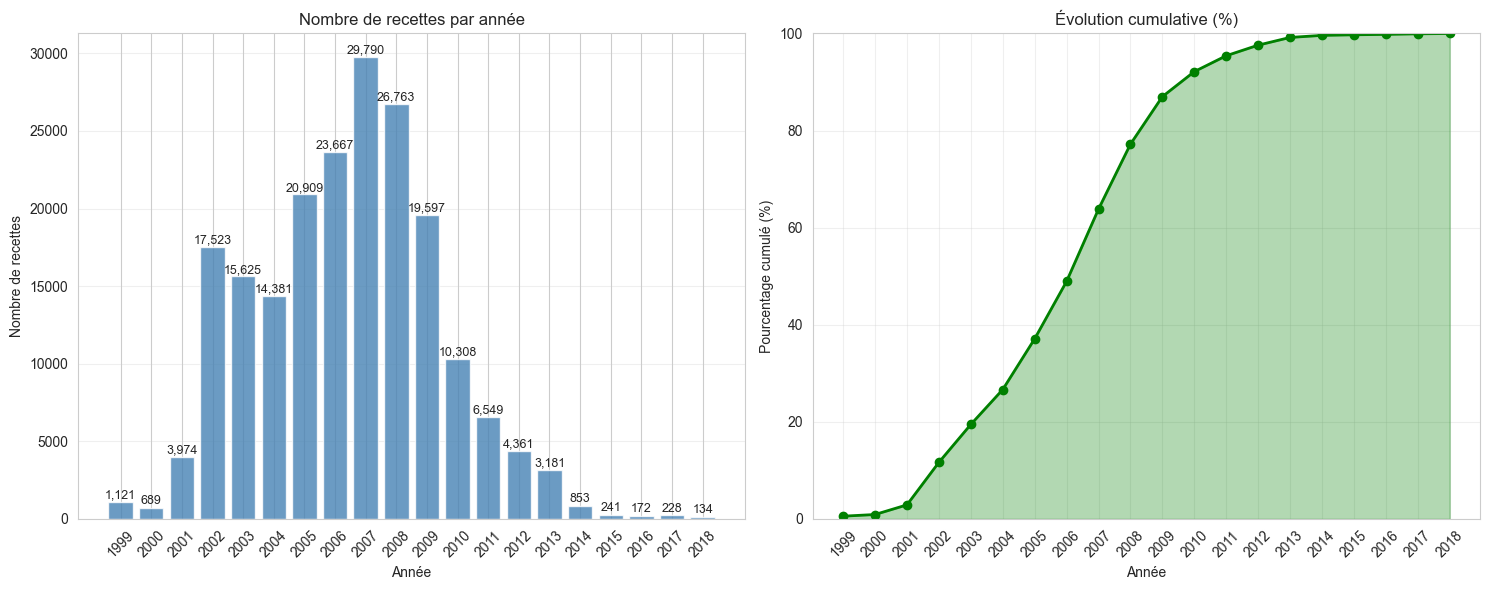

In [ ]:
recipes_per_year = (
    df.group_by("year")
    .agg(pl.len().alias("n_recipes"))
    .sort("year")
    .to_pandas()
)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogramme
bars = ax1.bar(recipes_per_year['year'].astype(int), recipes_per_year['n_recipes'], 
               color='steelblue', alpha=0.8)
ax1.set_title('Nombre de recettes par année')
ax1.set_xlabel('Année')
ax1.set_ylabel('Nombre de recettes')
ax1.set_xticks(recipes_per_year['year'].astype(int))
ax1.set_xticklabels(recipes_per_year['year'].astype(int), rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Valeurs sur les barres
for bar, val in zip(bars, recipes_per_year['n_recipes']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
             f'{val:,}', ha='center', va='bottom', fontsize=9)

# Évolution cumulative
cumulative = recipes_per_year['n_recipes'].cumsum()
total_recipes = cumulative.iloc[-1]  
cumulative_pct = (cumulative / total_recipes) * 100

ax2.plot(recipes_per_year['year'].astype(int), cumulative_pct, 
         marker='o', linewidth=2, color='green', markersize=6)
ax2.fill_between(recipes_per_year['year'].astype(int), cumulative_pct, 
                 alpha=0.3, color='green')
ax2.set_title('Évolution cumulative (%)')
ax2.set_xlabel('Année')
ax2.set_ylabel('Pourcentage cumulé (%)')
ax2.set_ylim(0, 100)
ax2.set_xticks(recipes_per_year['year'].astype(int))
ax2.set_xticklabels(recipes_per_year['year'].astype(int), rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()